<a href="https://colab.research.google.com/github/kingy260/Project_2/blob/main/AER850_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

!git clone https://github.com/kingy260/Project_2
%cd /content/Project_2


Mounted at /content/drive
Cloning into 'Project_2'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 0), reused 9 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 65.32 KiB | 586.00 KiB/s, done.
/content/Project_2


Found 1942 files belonging to 3 classes.
Found 431 files belonging to 3 classes.
Found 539 files belonging to 3 classes.
(32, 3)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 253, 253, 256)       │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 126, 126, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 124, 124, 128)       │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 122, 122, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 238144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      60,965,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,339,075 (233.99 MB)

 Trainable params: 61,339,075 (233.99 MB)

 Non-trainable params: 0 (0.00 B)

(32, 256, 256, 1)
(32, 3)
Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 86s 994ms/step - accuracy: 0.3939 - loss: 2.2152 - val_accuracy: 0.5290 - val_loss: 0.9084
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 26s 421ms/step - accuracy: 0.5840 - loss: 0.9025 - val_accuracy: 0.7053 - val_loss: 0.7134
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 25s 411ms/step - accuracy: 0.6393 - loss: 0.7901 - val_accuracy: 0.6148 - val_loss: 0.8010
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 26s 420ms/step - accuracy: 0.6782 - loss: 0.7115 - val_accuracy: 0.6334 - val_loss: 0.7615
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 25s 410ms/step - accuracy: 0.6116 - loss: 0.8193 - val_accuracy: 0.7030 - val_loss: 0.6812
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 412ms/step - accuracy: 0.6630 - loss: 0.7457 - val_accuracy: 0.7169 - val_loss: 0.6955
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 25s 410ms/step - accuracy: 0.6945 - loss: 0.6791 - val_accuracy: 0.7030 - val_loss: 0.6958
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 25s 406ms/step - accuracy: 0.6979

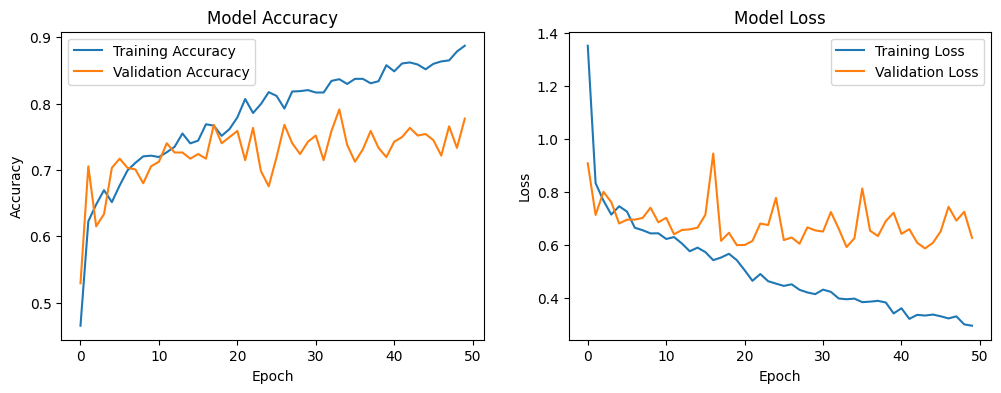

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling, RandomZoom, RandomFlip
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# data directories
train_data_dir = "/content/drive/My Drive/AER850/Project2/Project_2/Project2Data/Data/train"
val_data_dir = "/content/drive/My Drive/AER850/Project2/Project_2/Project2Data/Data/valid"
test_data_dir = "/content/drive/My Drive/AER850/Project2/Project_2/Project2Data/Data/test"


# defined image shape
im_shape = (256,256);

# load training and validation images
# load training images from the directory
train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,              # Directory containing your images
    labels='inferred',         # Infer labels from the directory structure
    label_mode='categorical',          # Use 'int' for integer labels, 'categorical' for one-hot, etc.
    batch_size=32,             # Number of images per batch
    image_size = im_shape,     # Resize images to im_shape pixels
    shuffle=True,               # Shuffle data at the beginning of each epoch
    color_mode='grayscale'
)

# load validation images
validation_data = tf.keras.utils.image_dataset_from_directory(
    val_data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size = im_shape,
    shuffle=True,
    color_mode='grayscale'
)

# load test images
test_data = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size = im_shape,
    shuffle=True,
    color_mode='grayscale'
)

for image, label in train_data.take(1):
    print(label.shape)  # Check the shape of the augmented images

# augment the training data with a rescale [0,1], random 15% shear slant, random 20% zoom
data_augmentation = Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip(mode="horizontal_and_vertical"),
    layers.RandomZoom(height_factor=0.2, width_factor=0.2)
])

train_data = train_data.map(lambda x, y: (data_augmentation(x), y))

# rescale only for validation data and test
validation_data = validation_data.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

test_data = test_data.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

# FIRST CNN FOR OVERFITTING
# sequential model
model_complex = Sequential()

# conv layer w/ 256 4x4 kernels
model_complex.add(Conv2D(256, (4, 4), activation='relu', input_shape=(256, 256, 1)))
# 2X2 max pooling layer
model_complex.add(MaxPooling2D(pool_size=(2, 2)))

# conv layer with 128 3x3 kernels, ReLU acitvation function
model_complex.add(Conv2D(128, (3, 3), activation='relu'))
model_complex.add(Conv2D(64, (3, 3), activation='relu'))
# 2X2 max pooling layer
model_complex.add(MaxPooling2D(pool_size=(2, 2)))

# flatten
model_complex.add(Flatten())
# dense layer with 256 neurons
model_complex.add(Dense(256, activation='relu'))
# output Layer with 3 classes (crack, missing head, paint off)
model_complex.add(Dense(3, activation='softmax'))
# compile the model
model_complex.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# display the model's architecture
model_complex.summary()

# SECOND CNN, TUNED
# sequential model
model_complex = Sequential()

# conv layer w/ 256 4x4 kernels
model_complex.add(Conv2D(256, (4, 4), activation='relu', input_shape=(256, 256, 1)))
# 2X2 max pooling layer
model_complex.add(MaxPooling2D(pool_size=(2, 2)))

# conv layer with 128 3x3 kernels, ReLU acitvation function
model_complex.add(Conv2D(128, (3, 3), activation='relu'))
model_complex.add(Conv2D(64, (3, 3), activation='relu'))
# 2X2 max pooling layer
model_complex.add(MaxPooling2D(pool_size=(2, 2)))

# flatten
model_complex.add(Flatten())
# dense layer with 256 neurons
model_complex.add(Dense(256, activation='relu'))
# output Layer with 3 classes (crack, missing head, paint off)
model_complex.add(Dense(3, activation='softmax'))
# compile the model
model_complex.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# display the model's architecture
model_complex.summary()

# stopping criteria is a validation accuracy that doesnt increase over 30 epochs
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=30,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

# train the model
history = model_complex.fit(
    train_data,
    epochs=50,
    validation_data=validation_data,
    callbacks=[early_stopping] #stopping criteria
)

# run on test data
test_loss, test_acc = model_complex.evaluate(test_data)
print(f'Test accuracy: {test_acc:.4f}')

# plot loss and accuracy curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()








On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
AER850_Project2.ipynb  Project_2.py  README.md
fatal: could not read Username for 'https://github.com': No such device or address
